<a href="https://colab.research.google.com/github/bennyfarias/Challenge_RPA/blob/main/An%C3%A1lise_de_Vendas_e_Desempenho_de_Neg%C3%B3cios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# --- Análise de vendas ---

# --- 1. Configuração Inicial e Carregamento de Bibliotecas ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- 2. Carregamento dos Dados ---

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('data.csv', encoding='ISO-8859-1') # Use a codificação correta se houver erro



Saving data.csv to data.csv


# --- 3. Entendimento e Limpeza de Dados (Data Understanding & Cleaning) ---


In [3]:
print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\nInformações do DataFrame:")
df.info()

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nValores ausentes por coluna:")
print(df.isnull().sum())


df.dropna(subset=['CustomerID'], inplace=True)
df['Description'].fillna('Unknown', inplace=True)

df_vendas = df[df['Quantity'] > 0].copy()


df_vendas['InvoiceDate'] = pd.to_datetime(df_vendas['InvoiceDate'])

df_vendas['TotalSales'] = df_vendas['Quantity'] * df_vendas['UnitPrice']

Primeiras 5 linhas do dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
--

/tmp/ipython-input-3-4173406495.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)


# --- 4. Análise Exploratória de Dados (EDA) ---


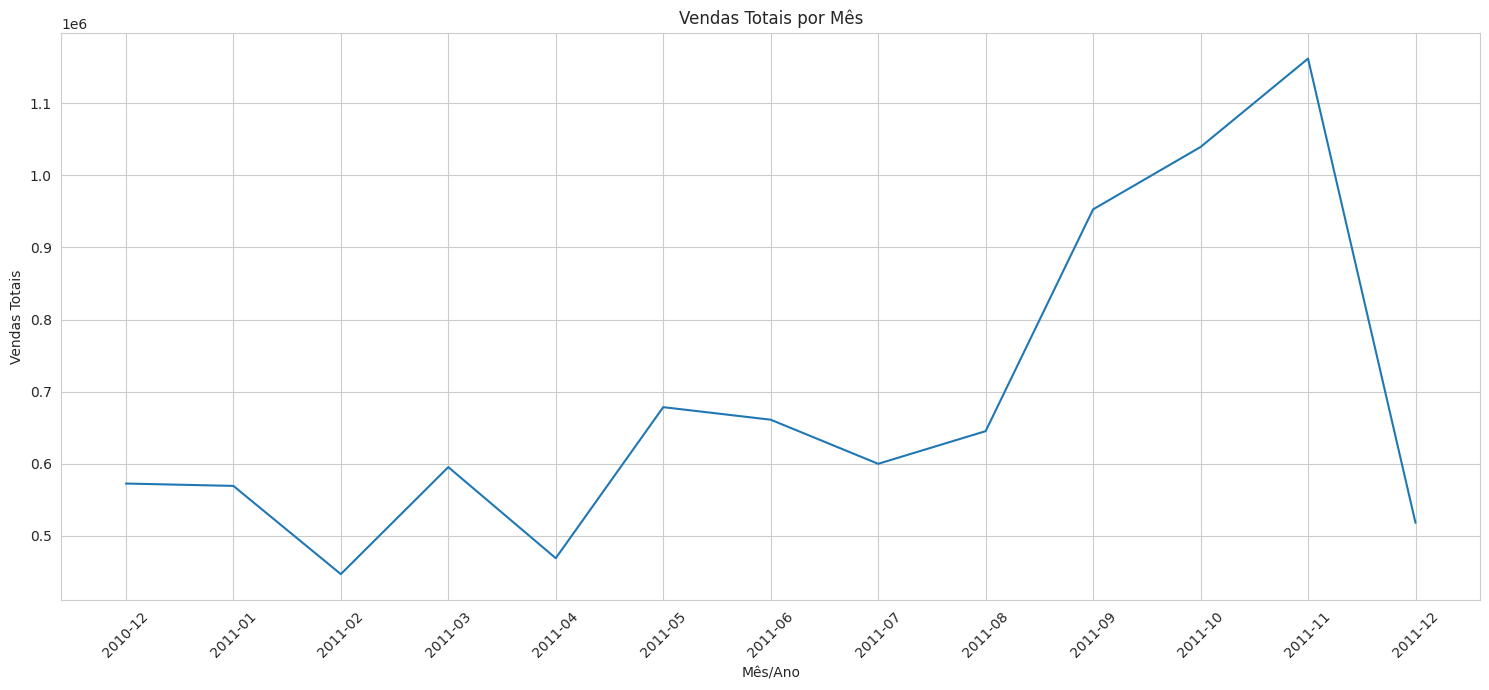

/tmp/ipython-input-4-3468969277.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Description', data=top_products_quantity, palette='viridis')


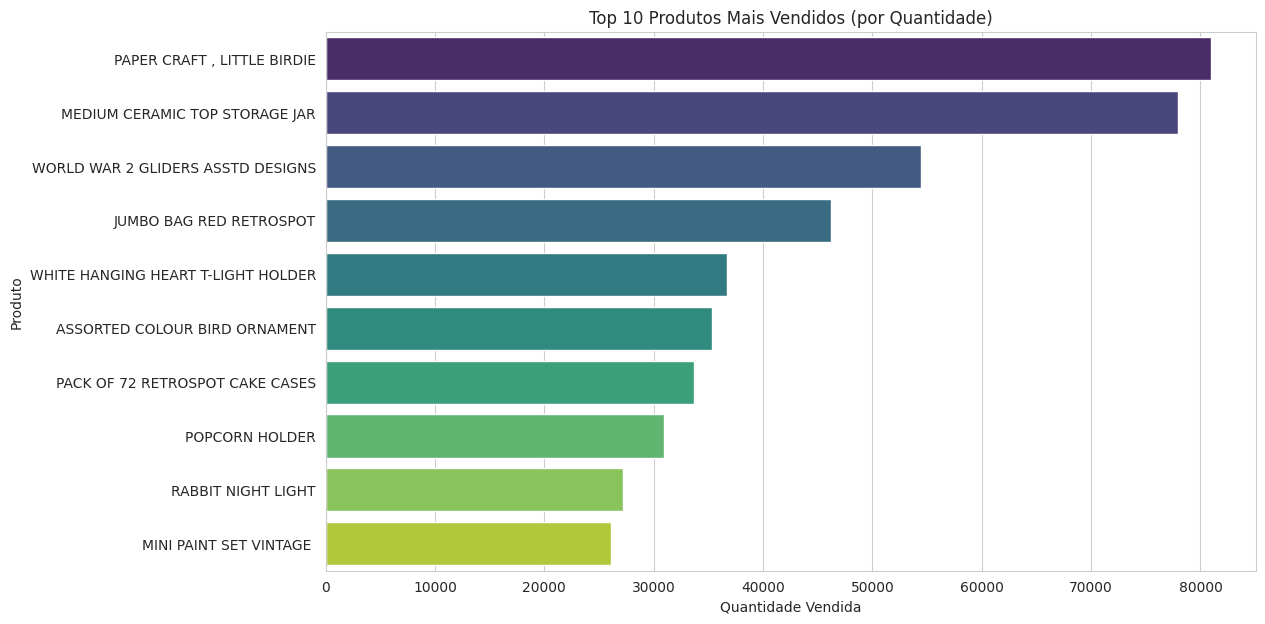

/tmp/ipython-input-4-3468969277.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Description', data=top_products_sales, palette='magma')


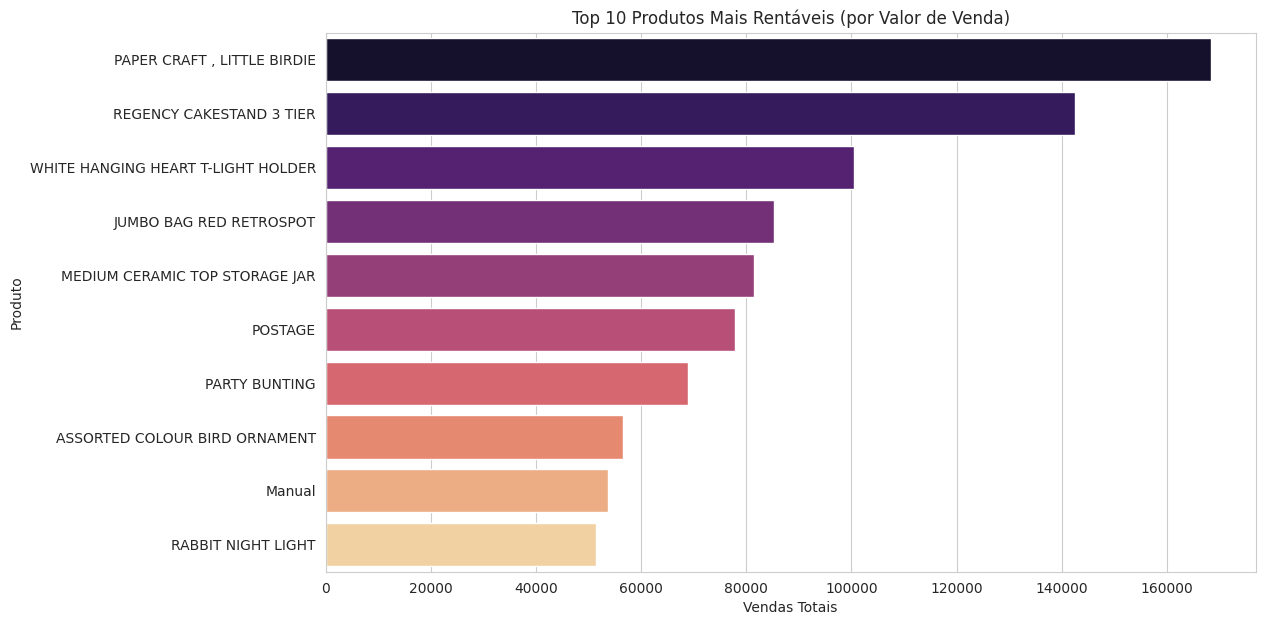

/tmp/ipython-input-4-3468969277.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='TotalSales', data=sales_by_country.head(10), palette='cividis') # Top 10 países


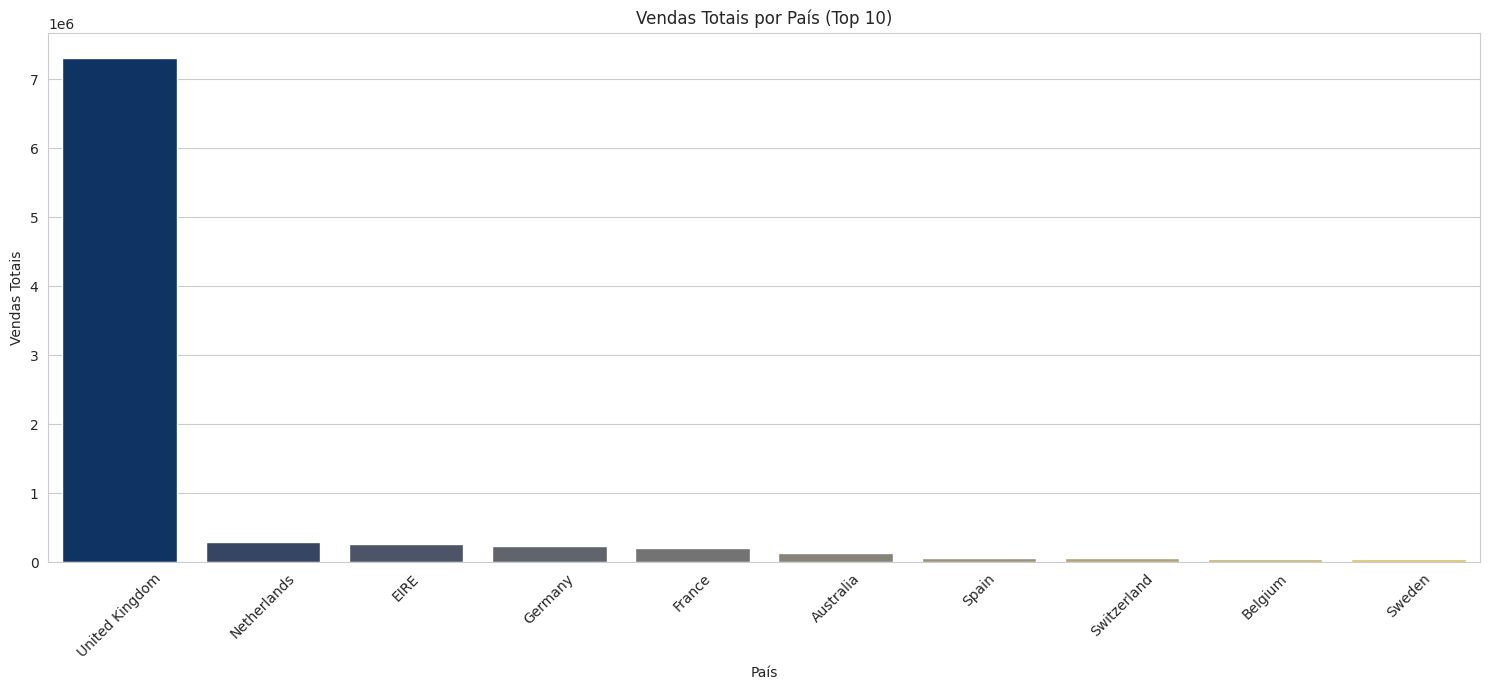

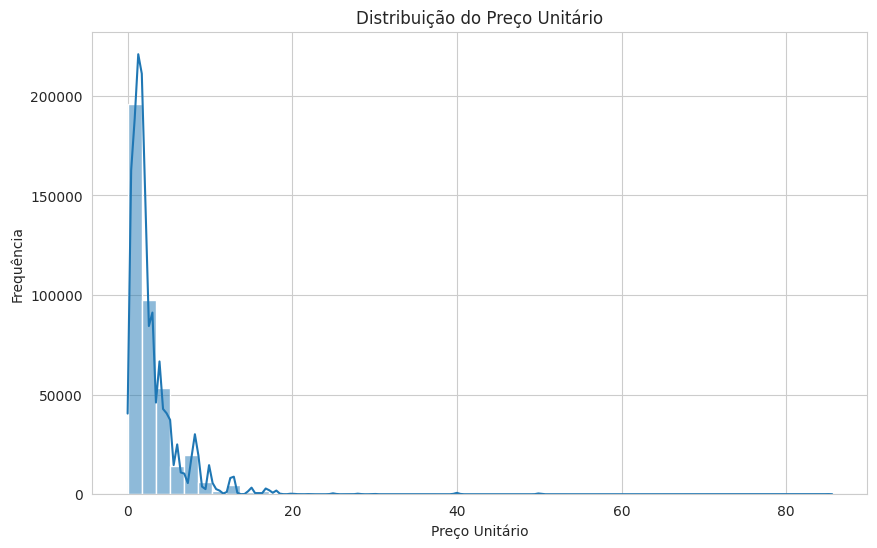

In [4]:
df_vendas['YearMonth'] = df_vendas['InvoiceDate'].dt.to_period('M')
sales_by_month = df_vendas.groupby('YearMonth')['TotalSales'].sum().reset_index()
sales_by_month['YearMonth'] = sales_by_month['YearMonth'].astype(str) # Para plotar como string

plt.figure(figsize=(15, 7))
sns.lineplot(x='YearMonth', y='TotalSales', data=sales_by_month)
plt.title('Vendas Totais por Mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_products_quantity = df_vendas.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(x='Quantity', y='Description', data=top_products_quantity, palette='viridis')
plt.title('Top 10 Produtos Mais Vendidos (por Quantidade)')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()

top_products_sales = df_vendas.groupby('Description')['TotalSales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(x='TotalSales', y='Description', data=top_products_sales, palette='magma')
plt.title('Top 10 Produtos Mais Rentáveis (por Valor de Venda)')
plt.xlabel('Vendas Totais')
plt.ylabel('Produto')
plt.show()

sales_by_country = df_vendas.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15, 7))
sns.barplot(x='Country', y='TotalSales', data=sales_by_country.head(10), palette='cividis') # Top 10 países
plt.title('Vendas Totais por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_vendas['UnitPrice'][df_vendas['UnitPrice'] < 100], bins=50, kde=True) # Filtrar valores extremos
plt.title('Distribuição do Preço Unitário')
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.show()

# --- 5. Cálculo de KPIs (Key Performance Indicators) ---


In [5]:
total_sales = df_vendas['TotalSales'].sum()
print(f"\nKPIs de Desempenho:")
print(f"1. Vendas Totais: ${total_sales:,.2f}")

total_transactions = df_vendas['InvoiceNo'].nunique()
print(f"2. Número Total de Transações: {total_transactions}")

total_customers = df_vendas['CustomerID'].nunique()
print(f"3. Número Total de Clientes Únicos: {total_customers}")

# Média de Vendas por Transação (Ticket Médio)
average_transaction_value = total_sales / total_transactions
print(f"4. Ticket Médio por Transação: ${average_transaction_value:,.2f}")

# Média de Itens por Transação
items_per_transaction = df_vendas.groupby('InvoiceNo')['Quantity'].sum().mean()
print(f"5. Média de Itens por Transação: {items_per_transaction:,.2f}")


KPIs de Desempenho:
1. Vendas Totais: $8,911,407.90
2. Número Total de Transações: 18536
3. Número Total de Clientes Únicos: 4339
4. Ticket Médio por Transação: $480.76
5. Média de Itens por Transação: 279.55


##Análise RFM (Recência, Frequência, Valor Monetário)##



--- 8. Análise RFM ---

Contagem de clientes por segmento RFM:
Segment
Outros                       1705
Clientes Dormindo            1325
Potenciais Clientes Leais     462
Campeões                      324
Clientes Leais                249
Clientes Novos                187
Clientes em Risco              87
Name: count, dtype: int64


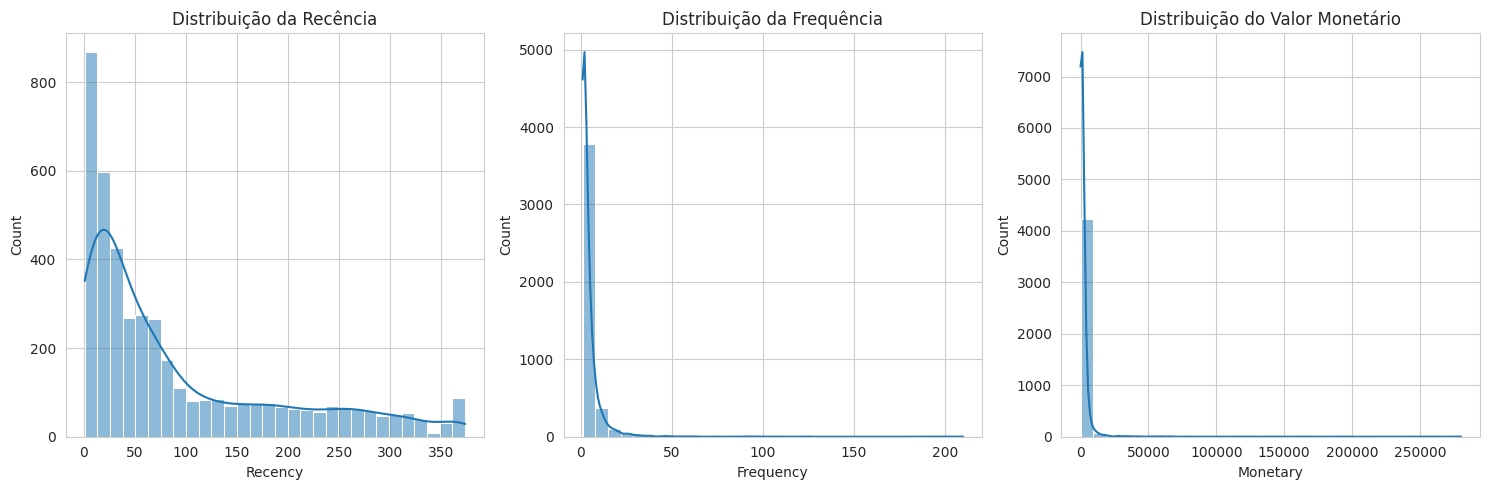

/tmp/ipython-input-9-3323684915.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='coolwarm')


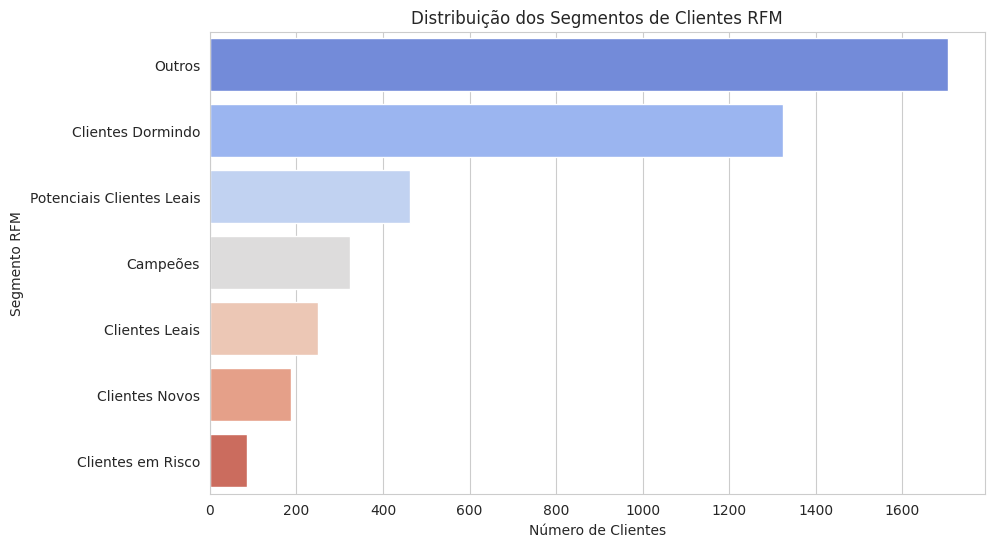

In [9]:
print("\n--- 8. Análise RFM ---")



snapshot_date = df_vendas['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df_vendas.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (snapshot_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalSales', 'sum')
).reset_index()

rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=False, duplicates='drop') + 1
rfm['R_Score'] = rfm['R_Score'].max() - rfm['R_Score'] + 1 # Inverte o score

rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=False, duplicates='drop') + 1
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=False, duplicates='drop') + 1

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

def rfm_segment(row):

    max_r = rfm['R_Score'].max()
    max_f = rfm['F_Score'].max()
    max_m = rfm['M_Score'].max()

    # Campeões: Comprou recentemente, compra frequentemente e gasta muito
    if row['R_Score'] >= (max_r * 0.9) and row['F_Score'] >= (max_f * 0.9) and row['M_Score'] >= (max_m * 0.9):
        return 'Campeões' # Top 10% em todas as métricas

    # Clientes Leais: Compra frequentemente e há um bom tempo
    elif row['R_Score'] >= (max_r * 0.7) and row['F_Score'] >= (max_f * 0.8) and row['M_Score'] >= (max_m * 0.7):
        return 'Clientes Leais' # Top 20-30% em Recência e Frequência/Monetário

    # Potenciais Clientes Leais: Clientes recentes com boa frequência/monetário, mas ainda não "campeões"
    elif row['R_Score'] >= (max_r * 0.8) and row['F_Score'] >= (max_f * 0.7):
        return 'Potenciais Clientes Leais'

    # Clientes Novos: Compraram recentemente, mas ainda não têm muita frequência/valor
    elif row['R_Score'] >= (max_r * 0.9) and row['F_Score'] <= (max_f * 0.3):
        return 'Clientes Novos'

    # Clientes em Risco: Não comprou recentemente, mas comprou com frequência no passado
    elif row['R_Score'] <= (max_r * 0.3) and row['F_Score'] >= (max_f * 0.5):
        return 'Clientes em Risco'

    # Clientes Dormindo: Não comprou recentemente e não tem muita frequência
    elif row['R_Score'] <= (max_r * 0.4) and row['F_Score'] <= (max_f * 0.4):
        return 'Clientes Dormindo'

    # Clientes Perdidos: Não comprou há muito tempo, baixa frequência e baixo valor monetário
    elif row['R_Score'] <= (max_r * 0.2) and row['F_Score'] <= (max_f * 0.2) and row['M_Score'] <= (max_m * 0.2):
        return 'Clientes Perdidos'

    else:
        return 'Outros'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

print("\nContagem de clientes por segmento RFM:")
print(rfm['Segment'].value_counts())


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Distribuição da Recência')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Distribuição da Frequência')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Distribuição do Valor Monetário')

plt.tight_layout()
plt.show()

# Visualização dos segmentos RFM
plt.figure(figsize=(10, 6))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='coolwarm')
plt.title('Distribuição dos Segmentos de Clientes RFM')
plt.xlabel('Número de Clientes')
plt.ylabel('Segmento RFM')
plt.show()

## Análise Cohort


--- 9. Análise de Cohort ---

Matriz de Retenção de Clientes (em %):
CohortIndex     0      1      2      3      4      5      6      7      8   \
CohortMonth                                                                  
2010-12      100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92  35.37   
2011-01      100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22  29.98   
2011-02      100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89  24.74   
2011-03      100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01  27.88   
2011-04      100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   7.33   
2011-05      100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51    NaN   
2011-06      100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN    NaN   
2011-07      100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN    NaN   
2011-08      100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN    NaN   
2011-09      100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN    N

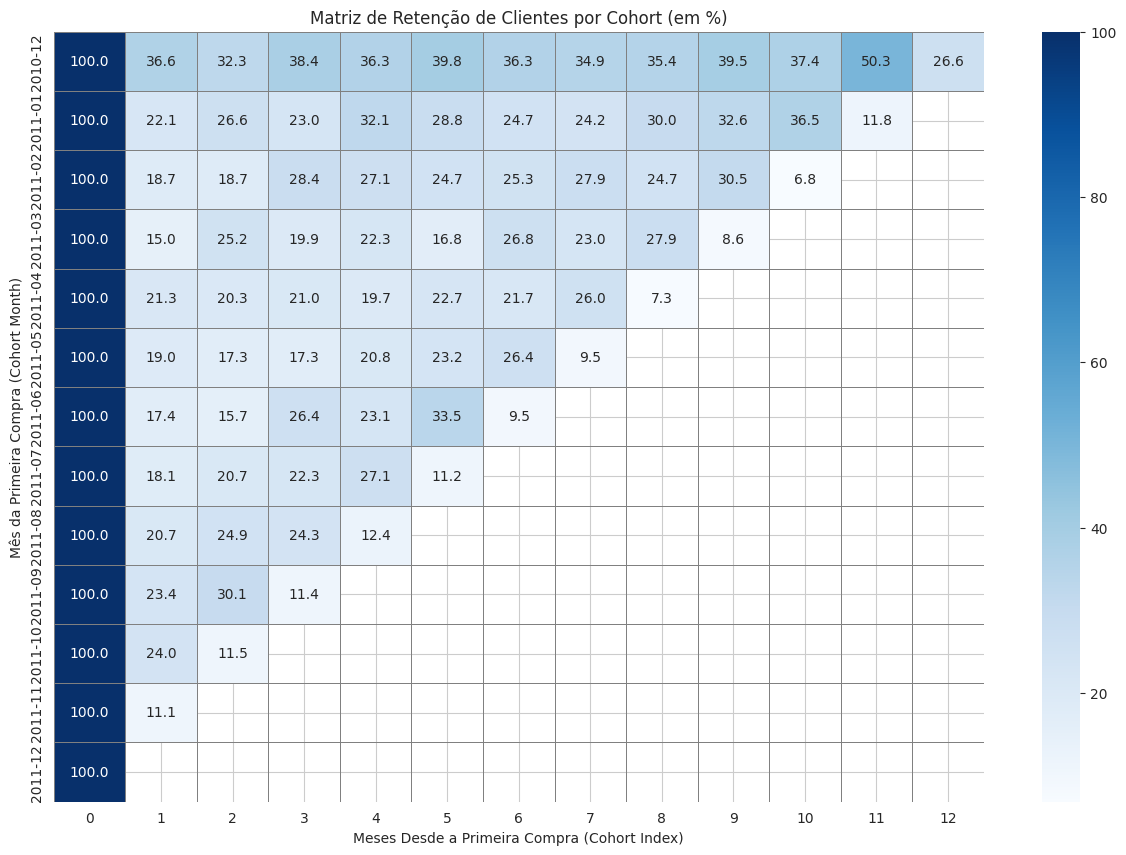


Insights da Análise Cohort:
- Observe a queda percentual na retenção de clientes a cada mês. Isso indica a 'curva de retenção'.
- Cohorts mais antigos tendem a estabilizar sua retenção em um determinado patamar.
- Identifique se há cohorts que performam significativamente melhor ou pior que outros, e investigue o porquê (ex: campanhas de aquisição daquele mês).


In [10]:
print("\n--- 9. Análise de Cohort ---")

df_vendas['InvoiceMonth'] = df_vendas['InvoiceDate'].dt.to_period('M')
df_customers = df_vendas.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
df_customers.columns = ['CustomerID', 'CohortMonth']

df_vendas = pd.merge(df_vendas, df_customers, on='CustomerID', how='left')

def get_month_difference(invoice_month, cohort_month):
    return (invoice_month.year - cohort_month.year) * 12 + \
           (invoice_month.month - cohort_month.month)

df_vendas['CohortIndex'] = df_vendas.apply(lambda x: get_month_difference(x['InvoiceMonth'], x['CohortMonth']), axis=1)

cohort_data = df_vendas.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_sizes = cohort_counts.iloc[:, 0] # Clientes no mês de aquisição (Index 0)
retention_matrix = cohort_counts.divide(cohort_sizes, axis=0) * 100 # Multiplicar por 100 para percentual

print("\nMatriz de Retenção de Clientes (em %):")
print(retention_matrix.round(2))

plt.figure(figsize=(15, 10))
sns.heatmap(retention_matrix, annot=True, fmt='.1f', cmap='Blues', linewidths=.5, linecolor='gray')
plt.title('Matriz de Retenção de Clientes por Cohort (em %)')
plt.xlabel('Meses Desde a Primeira Compra (Cohort Index)')
plt.ylabel('Mês da Primeira Compra (Cohort Month)')
plt.show()

print("\nInsights da Análise Cohort:")
print("- Observe a queda percentual na retenção de clientes a cada mês. Isso indica a 'curva de retenção'.")
print("- Cohorts mais antigos tendem a estabilizar sua retenção em um determinado patamar.")


#Análise de Cesta de Compras (Market Basket Analysis)



--- 10. Análise de Cesta de Compras ---

Top 10 Produtos Mais Frequentes:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: count, dtype: int64

Top 10 Pares de Produtos Mais Comprados Juntos:
- JUMBO BAG PINK POLKADOT e JUMBO BAG RED RETROSPOT: 546 vezes
- GREEN REGENCY TEACUP AND SAUCER e ROSES REGENCY TEACUP AND SAUCER : 541 vezes
- ALARM CLOCK BAKELIKE GREEN e ALARM CLOCK BAKELIKE RED : 530 vezes
- LUNCH BAG PINK POLKADOT e LUNCH BAG RED RETROSPOT: 523 vezes
- LUNCH BAG  BLACK SKULL. e LUNCH BAG RED RETROSPOT: 517 vezes
- WOODEN FRAME ANTIQUE WHITE  e WOODEN PICTURE FRAME WHITE FINISH: 468 

/tmp/ipython-input-11-71278973.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values, y=item_counts.index, palette='plasma')


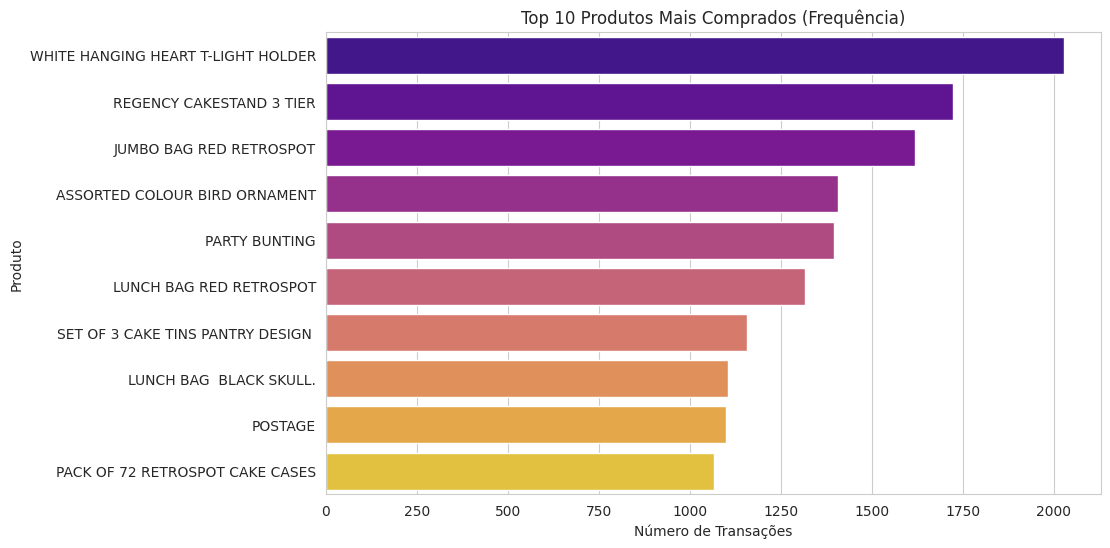


Insights da Análise de Cesta de Compras:
- Os pares mais frequentes indicam oportunidades para cross-selling (ex: clientes que compram X também compram Y).
- Use esses insights para otimizar o layout da loja online/física, criar ofertas de 'compre junto' ou 'kits'.
- Produtos que aparecem juntos mas são inesperados podem revelar novos padrões de consumo.


In [11]:
print("\n--- 10. Análise de Cesta de Compras ---")


transactions = df_vendas.groupby('InvoiceNo')['Description'].apply(list).tolist()


item_counts = df_vendas['Description'].value_counts().head(10)
print("\nTop 10 Produtos Mais Frequentes:")
print(item_counts)


from itertools import combinations
from collections import Counter

filtered_transactions = [list(set(t)) for t in transactions if len(set(t)) > 1] # Itens únicos na cesta

pair_counts = Counter()
for transaction in filtered_transactions:
    # Gerar todas as combinações de 2 itens dentro de cada transação
    for item1, item2 in combinations(sorted(transaction), 2): # sorted para garantir ordem consistente
        pair_counts[(item1, item2)] += 1

top_10_pairs = pair_counts.most_common(10)
print("\nTop 10 Pares de Produtos Mais Comprados Juntos:")
for pair, count in top_10_pairs:
    print(f"- {pair[0]} e {pair[1]}: {count} vezes")

# Visualização (Exemplo: produtos mais frequentes)
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, palette='plasma')
plt.title('Top 10 Produtos Mais Comprados (Frequência)')
plt.xlabel('Número de Transações')
plt.ylabel('Produto')
plt.show()

# Insights da Análise de Cesta de Compras
print("\nInsights da Análise de Cesta de Compras:")
print("- Os pares mais frequentes indicam oportunidades para cross-selling (ex: clientes que compram X também compram Y).")
print("- Use esses insights para otimizar o layout da loja online/física, criar ofertas de 'compre junto' ou 'kits'.")
print("- Produtos que aparecem juntos mas são inesperados podem revelar novos padrões de consumo.")